<a href="https://colab.research.google.com/github/Priyanka-Police-Reddy-Gari/MailReplySummaryTranslate/blob/main/Updated_ui.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.5 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
file_path = '/content/drive/My Drive/Project/data/'

In [6]:
import requests
import pandas as pd
import json

print("API Call")
incident_url = 'https://dev272756.service-now.com/api/now/table/incident'
headers = {'Accept': 'application/json','Content-Type': 'application/json'}
params = {'sysparm_limit': 1000} # Fetch only 100 records at a time
incident_response = requests.get(incident_url, headers=headers, auth=('admin', '$gN!x1wLFI1p'), timeout=10, params=params)
print("Response ..............")
print(incident_response.text[:500])
try:
  incident_df = incident_response.json()
  print("Dataaaaa..= ")
  print(incident_df)
except json.JSONDecodeError:
  print("Failed to decode JSON")

try:
  incident_df = pd.DataFrame(incident_df['result'])
  print(incident_df.shape)
  incident_df.to_csv('/content/drive/My Drive/Project/data/incident.csv', index=False)
except KeyError:
  print("Key not found in JSON")


API Call
Response ..............
{"result":[{"parent":"","made_sla":"true","caused_by":"","watch_list":"","upon_reject":"cancel","sys_updated_on":"2016-12-14 02:46:44","child_incidents":"0","hold_reason":"","origin_table":"","task_effective_number":"INC0000060","approval_history":"","number":"INC0000060","resolved_by":{"link":"https://dev272756.service-now.com/api/now/table/sys_user/5137153cc611227c000bbd1bd8cd2007","value":"5137153cc611227c000bbd1bd8cd2007"},"sys_updated_by":"employee","opened_by":{"link":"https://dev272756.se
Dataaaaa..= 
{'result': [{'parent': '', 'made_sla': 'true', 'caused_by': '', 'watch_list': '', 'upon_reject': 'cancel', 'sys_updated_on': '2016-12-14 02:46:44', 'child_incidents': '0', 'hold_reason': '', 'origin_table': '', 'task_effective_number': 'INC0000060', 'approval_history': '', 'number': 'INC0000060', 'resolved_by': {'link': 'https://dev272756.service-now.com/api/now/table/sys_user/5137153cc611227c000bbd1bd8cd2007', 'value': '5137153cc611227c000bbd1bd8cd

In [7]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
print(f"Initial data shape: {incident_df.shape}")

# Data Preprocessing
# 1. Handle missing values
incident_df.dropna(inplace=True)
print(f"After dropping na data shape: {incident_df.shape}")
print(incident_df.head())
print(incident_df.info())

# Calculate resolution time
incident_df['opened_at'] = pd.to_datetime(incident_df['opened_at'])
incident_df['resolved_at'] = pd.to_datetime(incident_df['resolved_at'])
incident_df['resolution_time'] = (incident_df['resolved_at'] - incident_df['opened_at']).astype('timedelta64[s]')
incident_df['resolution_time_seconds'] = (incident_df['resolved_at'] - incident_df['opened_at']).dt.total_seconds()
print(f"After calculating resolution time data shape: {incident_df.shape}")
print(incident_df.head())

# Drop unnecessary columns
incident_df.drop(columns=['sys_id', 'number', 'parent', 'sys_updated_on', 'sys_created_on',
                          'short_description', 'description'], inplace=True)
incident_df.dropna(subset=['resolution_time_seconds'], inplace=True)

print(f"Cleaned data shape: {incident_df.shape}")
print(incident_df[['opened_at','closed_at','priority','resolution_time_seconds','resolution_time']])



Initial data shape: (67, 92)
After dropping na data shape: (67, 92)
  parent made_sla caused_by watch_list upon_reject       sys_updated_on  \
0            true                           cancel  2016-12-14 02:46:44   
1            true                           cancel  2024-09-27 12:38:36   
2           false                                   2024-09-26 20:16:04   
3           false                                   2024-09-26 20:16:35   
4           false                                   2024-09-26 19:56:31   

  child_incidents hold_reason origin_table task_effective_number  ...  \
0               0                                     INC0000060  ...   
1               1                                     INC0009002  ...   
2                                                     INC0000009  ...   
3                                                     INC0000010  ...   
4                                                     INC0000011  ...   

  comments_and_work_notes due_date sys_mod

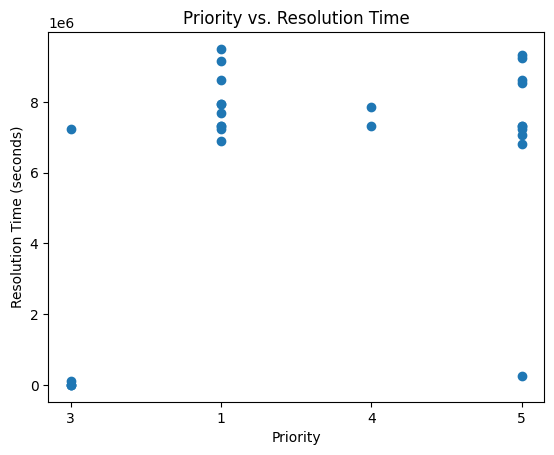

In [8]:
plt.scatter(incident_df['priority'], incident_df['resolution_time_seconds'])
plt.xlabel('Priority')
plt.ylabel('Resolution Time (seconds)')
plt.title('Priority vs. Resolution Time')
plt.show()


In [9]:
# # Step 2: Model Building

# # Assuming incident_df is your DataFrame, ensure the priority column is numeric
# incident_df['priority'] = pd.to_numeric(incident_df['priority'], errors='coerce')  # Convert to numeric, coerce errors
# # Select Features (X) and Target (y)
# X = incident_df[['priority']] # Add more relevant columns as needed
# y = incident_df['resolution_time_seconds']  # Assuming 'resolution_time_seconds' is the target

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize the Linear Regression model
# model = LinearRegression()

# # Train the model
# model.fit(X_train, y_train)

# # Step 4: Create a DataFrame for unique priorities
# unique_priorities = pd.DataFrame({'priority': [5, 4, 3, 2, 1]})

# # Step 5: Predict resolution time for each priority
# predictions = model.predict(unique_priorities)

# # Step 6: Combine priorities with predictions
# predictions_df = pd.DataFrame({
#     'priority': unique_priorities['priority'],
#     'predicted_resolution_time_seconds': predictions
# })

# # Print the predictions
# print(predictions_df)


# # Step 4: Model Evaluation

# # Calculate Mean Squared Error and R-squared value
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# # Print the evaluation metrics
# print(f'Mean Squared Error: {mse:.4f}')
# print(f'R-squared: {r2:.4f}')

In [10]:

# Repeat the model training process with the inverted priority values
X = incident_df[['priority']]
y = incident_df['resolution_time_seconds']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Step 4: Create a DataFrame for the original priority values (before inversion)
priorities = pd.DataFrame({'priority': [1, 2, 3, 4, 5]})

predictions = model.predict(priorities)



In [11]:
predictions_df = pd.DataFrame()

In [12]:
predictions_df['priorities'] = [5, 4, 3, 2, 1]
predictions_df['predicted_resolution_time_seconds'] = predictions
predictions_df = predictions_df[['priorities', 'predicted_resolution_time_seconds']]
predictions_df.reset_index(drop=True, inplace=True)
print(predictions_df)


   priorities  predicted_resolution_time_seconds
0           5                       7.051135e+06
1           4                       6.696549e+06
2           3                       6.341963e+06
3           2                       5.987377e+06
4           1                       5.632790e+06


In [13]:
import pandas as pd
from datetime import timedelta

# Function to convert seconds to days, hours, and minutes
def convert_seconds_to_dhm(seconds):
    time_delta = timedelta(seconds=seconds)
    days = time_delta.days
    hours, remainder = divmod(time_delta.seconds, 3600)
    minutes, _ = divmod(remainder, 60)
    return f"{days}d {hours}h {minutes}m"

# Apply the function to the 'predicted_resolution_time_seconds' column
predictions_df['resolution_time_dhm'] = predictions_df['predicted_resolution_time_seconds'].apply(convert_seconds_to_dhm)

# Print the updated DataFrame with the new 'resolution_time_dhm' column
print(predictions_df[['priorities', 'predicted_resolution_time_seconds', 'resolution_time_dhm']])

   priorities  predicted_resolution_time_seconds resolution_time_dhm
0           5                       7.051135e+06         81d 14h 38m
1           4                       6.696549e+06          77d 12h 9m
2           3                       6.341963e+06          73d 9h 39m
3           2                       5.987377e+06           69d 7h 9m
4           1                       5.632790e+06          65d 4h 39m


In [14]:
sorted_df = predictions_df.sort_values(by='priorities', ascending=True)

# Print the sorted DataFrame
sorted_df = sorted_df[['priorities', 'resolution_time_dhm']]
sorted_df.columns = ['Priority', 'Resolution Time']
print(sorted_df.to_string())



   Priority Resolution Time
4         1      65d 4h 39m
3         2       69d 7h 9m
2         3      73d 9h 39m
1         4      77d 12h 9m
0         5     81d 14h 38m


In [15]:
sorted_df.to_csv('/content/drive/My Drive/Project/data/sorted_df.csv', index=False)

In [20]:
%%writefile your_script.py
import streamlit as st
from PIL import Image
import pandas as pd
import base64

st.set_page_config(page_title="InsightServe", page_icon="📊")
# Inject CSS to handle styling for all devices (desktop, mobile, etc.)
st.markdown("""
    <style>
    /* Apply these styles for all devices */
    body {
        color: black; /* Change main text color to black */
    }
    h1, h2, h3, h4, h5, h6 {
        color: black; /* Change heading colors to black */
    }
    p {
        color: black; /* Change paragraph text color to black */
    }
    /* Specific styles for buttons */
    .stButton>button {
        background-color: #4CAF50; /* Green background for buttons */
        color: white;               /* White text for buttons */
    }
    /* Specific styles for download button */
    .stDownloadButton>button {
        background-color: #2196F3; /* Blue background for download button */
        color: white;              /* White text for download button */
    }
    </style>
    """, unsafe_allow_html=True)
# Function to add background image
def add_bg_from_local(image_file):
    with open(image_file, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read()).decode()

    st.markdown(
         f"""
         <style>
         .stApp {{
             background-image: url("data:image/png;base64,{encoded_string}");
             background-size: cover;
         }}
         </style>
         """,
         unsafe_allow_html=True
     )

# Add your background image here (ensure it's uploaded to Colab first)
add_bg_from_local('/content/drive/My Drive/Project/data/bg_images/Landscape pink.png')

sorted_df = pd.read_csv('/content/drive/My Drive/Project/data/sorted_df.csv')
# Streamlit app

st.title('Hello, Users!')
st.write('This is your web application from **PRIYANKA** which gives reports from ServiceNow and also predicts')

table_options = ['None','Incident', 'Problem', 'Change','CMDB']
selected_table = st.selectbox('**Select a TABLE:**', table_options)
st.write(f'You selected: {selected_table}')

if selected_table == 'Incident':
  #get incident table data

  report_options = ['Incidents based on priority', 'Incidents raised by departments', 'Incidents raised today','Incident Volume by Category/Type']
  selected_report = st.selectbox('**Select a Report:**', report_options)
  st.write(f'You selected: {selected_report}')
  if st.button('Run Report'):
    st.write('Running..'+selected_report+'...')
    # Load the image
    if selected_report == 'Incidents based on priority':
      image = Image.open('/content/drive/My Drive/Project/data/Incidents_based_on_priority.jpeg')
      st.image(image, caption='Incidents based on priority')
      # st.bar_chart(incident_dataframe['priority'].value_counts())
      # Path to your PDF file (which includes images)
      pdf_file_path = '/content/drive/My Drive/Project/data/Incidents_based_on_priority.pdf'
      # Open the PDF file in binary mode
      with open(pdf_file_path, 'rb') as pdf_file:
        pdf_data = pdf_file.read()
      # Display download button for the PDF
      st.download_button(label="Download PDF",data=pdf_data,file_name="Incidents_based_on_priority_downloaded_report.pdf",mime='application/pdf')
    if selected_report == 'Incidents raised by departments':
      image = Image.open('/content/drive/My Drive/Project/data/Incidents_raised_by_departments.jpeg')
      st.image(image, caption='Incidents raised by departments', use_column_width=True)

      pdf_file_path = '/content/drive/My Drive/Project/data/Incidents_raised_by_departments.pdf'
      with open(pdf_file_path, 'rb') as pdf_file:
        pdf_data = pdf_file.read()
      st.download_button(label="Download PDF",data=pdf_data,file_name="Incidents_raised_by_departments_downloaded_report.pdf",mime='application/pdf')
    if selected_report == 'Incidents raised today':
      image = Image.open('/content/drive/My Drive/Project/data/Incidents_created_today.jpg')
      st.image(image, caption='Incidents raised today', use_column_width=True)
      pdf_file_path = '/content/drive/My Drive/Project/data/Incidents_created_today.pdf'
      with open(pdf_file_path, 'rb') as pdf_file:
        pdf_data = pdf_file.read()
      st.download_button(label="Download PDF",data=pdf_data,file_name="Incidents_raised_today_downloaded_report.pdf",mime='application/pdf')
    if selected_report == 'Incident Volume by Category/Type':
      image = Image.open('/content/drive/My Drive/Project/data/Incidents_volume_by_category.jpeg')
      st.image(image, caption='Incident Volume by Category/Type', use_column_width=True)
      pdf_file_path = '/content/drive/My Drive/Project/data/Incidents_volume_by_category.pdf'
      with open(pdf_file_path, 'rb') as pdf_file:
        pdf_data = pdf_file.read()
      st.download_button(label="Download PDF",data=pdf_data,file_name="Incident_Volume_by_Category_downloaded_report.pdf",mime='application/pdf')

  if st.button('Predict resolution time for incidents'):
    st.write('Predicting...')
    styled_df = (sorted_df.style
    .set_properties(**{'text-align': 'center'})
    .set_table_styles(
        [{'selector': 'th', 'props': [
            ('text-align', 'center'),
            ('background-color', '#FFFFFF'),
            ('font-weight', 'bold'),
            ('color', '#000'),
            ('border', '1px solid black')
        ]},
        {'selector': 'td', 'props': [
            ('text-align', 'center'),
            ('background-color', '#FFFFFF'),
            ('color', '#000'),
            ('border', '1px solid black')
        ]}
        ]))
    st.dataframe(styled_df, hide_index = True)
    # st.markdown(styled_df.to_html(escape=False), unsafe_allow_html=True)
if selected_table == 'Problem':
  report_options = ['Report 1', 'Report 2', 'Report 3']
  selected_report = st.selectbox('Select a Report:', report_options)
  st.write(f'You selected: {selected_report}')
  if st.button('Run Report'):
    st.write('Running Report 1...')
    st.write('Report 1 completed.')
  if st.button('Predict future problems'):
    st.write('Predicting...')
    st.write('Prediction completed. results =')
if selected_table == 'Change':
  report_options = ['Report 1', 'Report 2', 'Report 3']
  selected_report = st.selectbox('Select a Report:', report_options)
  st.write(f'You selected: {selected_report}')
  if st.button('Run Report'):
    st.write('Running Report 1...')
    st.write('Report 1 completed.')
  if st.button('Predict future changes'):
    st.write('Predicting...')
    st.write('Prediction completed. results =')


Overwriting your_script.py


In [17]:
!pip install pyngrok

In [18]:
!ngrok authtoken 2mS39Pp1ZZKJlGUNr7Nro5UwMQs_b4h38uCFPqLFBNM9NSxb

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [19]:
from pyngrok import ngrok

# Start ngrok
public_url = ngrok.connect(8501,"http")
print(f'Public URL: {public_url}')

# Run Streamlit
!streamlit run your_script.py &>/dev/null&


Public URL: NgrokTunnel: "https://76dc-34-135-180-199.ngrok-free.app" -> "http://localhost:8501"
